# 1. Regression

## 1.1. Load Data and Train Model

# SHAP Metrics

In [2]:
import sys

sys.path.insert(0, "/home/cristian/holisticai/src")

In [3]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=1000, random_state=42)
train = dataset['train']
test = dataset['test']

model = DecisionTreeRegressor()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.0403204)

# Create a Custom Feature Importance Calculator

In [4]:
from holisticai.utils import RegressionProxy
from holisticai.utils.feature_importances import compute_shap_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

X = test['X']
proxy = RegressionProxy(predict=model.predict)

local_importances = compute_shap_feature_importance(X=X, proxy=proxy)
local_conditional_importances = local_importances.conditional()

importances = local_importances.to_global()
conditional_importances = local_conditional_importances.to_global()

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(X, features=ranked_importances.feature_names, proxy=proxy)

y_pred = proxy.predict(X)

PermutationExplainer explainer: 1001it [00:33, 23.40it/s]                         


In [5]:
from holisticai.explainability.metrics import regression_explainability_metrics

regression_explainability_metrics(importances=importances, 
                                partial_dependencies=partial_dependencies, 
                                conditional_importances=conditional_importances, 
                                local_importances=local_importances)

,value,reference
metric,,
Alpha Importance Score,0.316832,0.0
XAI Ease Score,0.703125,1.0
Position Parity,0.307829,1.0
Rank Alignment,0.853511,1.0
Spread Ratio,0.803714,0.0
Spread Divergence,0.477920,0.0
Feature Stability,0.921928,1.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

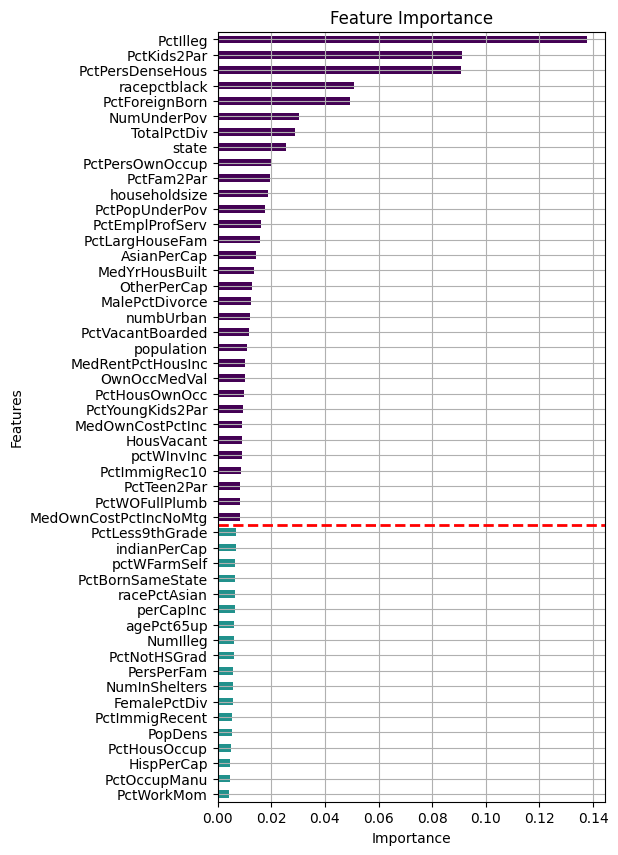

In [6]:
from holisticai.explainability.plots import plot_feature_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1, figsize=(5,10))
plot_feature_importance(importances, top_n=50, ax=ax)

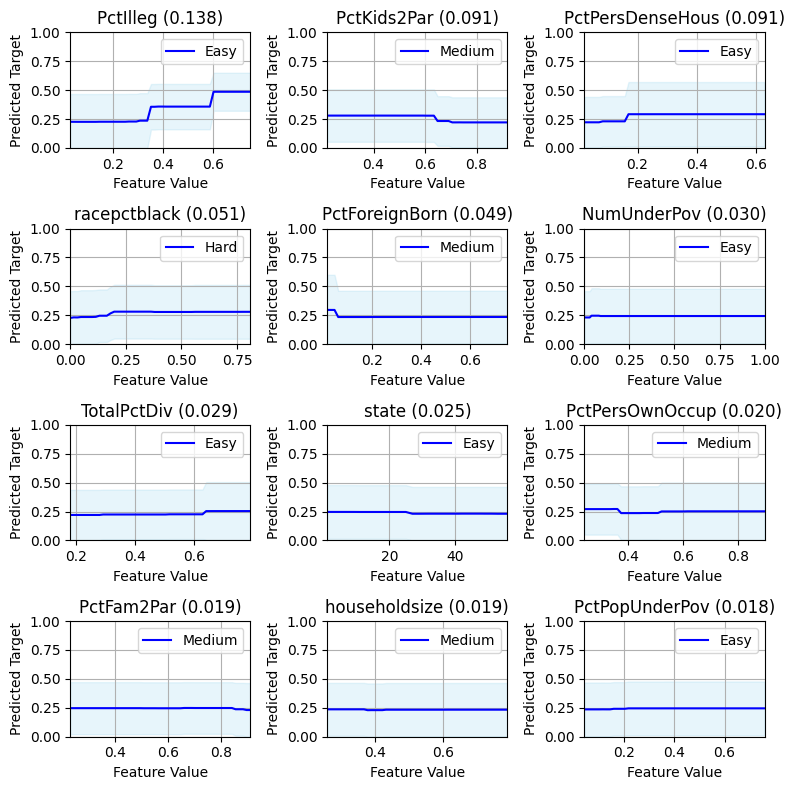

In [7]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(4,3), figsize=(8, 8))

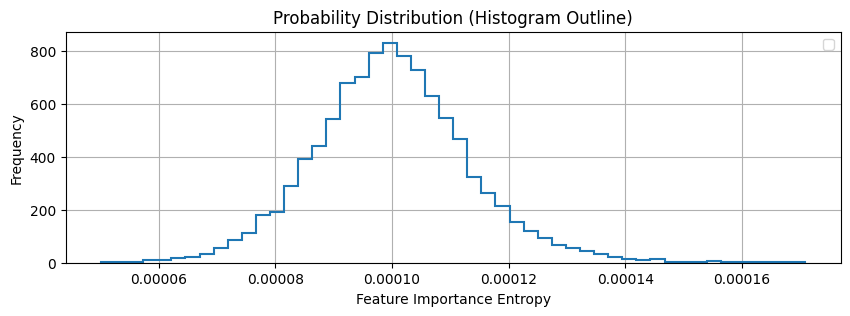

In [8]:
from holisticai.explainability.plots import plot_local_importance_distribution

plot_local_importance_distribution(local_importances)
plt.show()

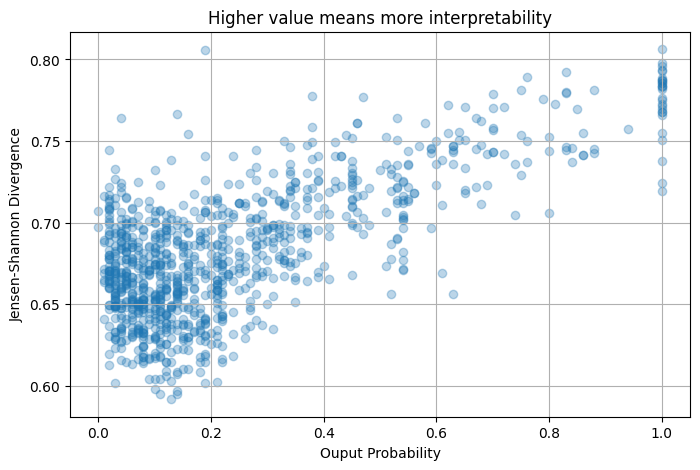

In [9]:
from holisticai.explainability.plots import plot_predictions_vs_interpretability

plot_predictions_vs_interpretability(y_pred, local_importances)
plt.show()

# 3. Classification

In [10]:
from holisticai.utils import BinaryClassificationProxy
from holisticai.utils.feature_importances import compute_shap_feature_importance
from holisticai.utils.inspection import compute_partial_dependence
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
dataset = load_dataset(dataset_name="adult")
dataset = dataset.train_test_split(test_size=2000, random_state=42, stratify=dataset['y'])
train = dataset['train']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.7925

In [12]:
X = test['X']
proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

local_importances = compute_shap_feature_importance(X=X, proxy=proxy)
local_conditional_importances = local_importances.conditional()
importances = local_importances.to_global()
conditional_importances = local_conditional_importances.to_global()

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

y_pred = proxy.predict(X)
y_score = proxy.predict_proba(X)[:,1]

PermutationExplainer explainer: 2001it [00:23, 48.80it/s]                          


In [13]:
from holisticai.explainability.metrics import classification_explainability_metrics

classification_explainability_metrics(importances, partial_dependencies, conditional_importances, local_importances=local_importances)

,value,reference
metric,,
Alpha Importance Score,0.020619,0.0
XAI Ease Score,0.750000,1.0
Position Parity,1.000000,1.0
Rank Alignment,1.000000,1.0
Spread Ratio,0.247666,0.0
Spread Divergence,0.071051,0.0
Feature Stability,0.955307,1.0


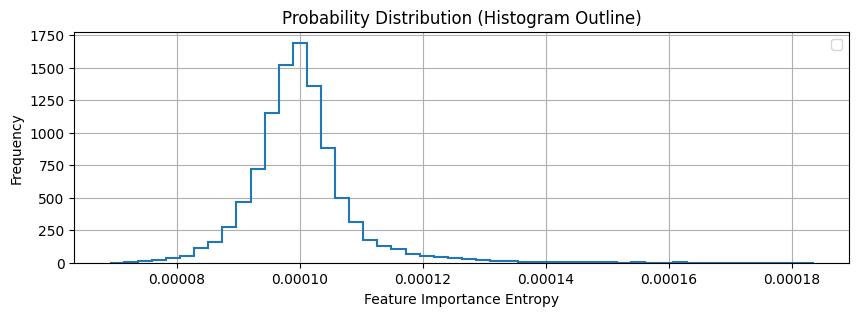

In [14]:
plot_local_importance_distribution(local_importances)
plt.show()

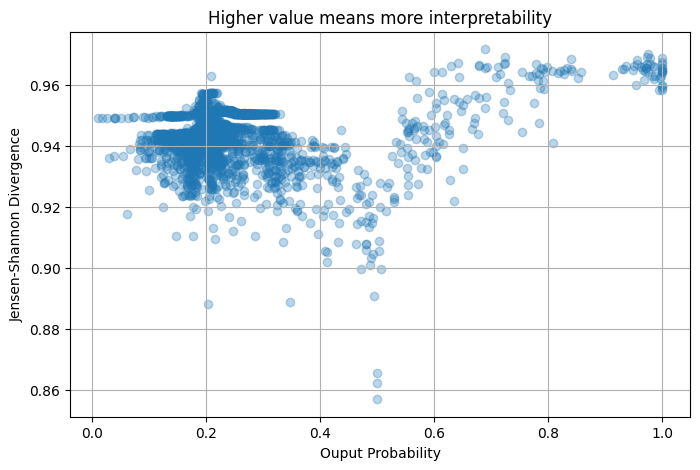

In [15]:
plot_predictions_vs_interpretability(y_score, local_importances)
plt.show()

<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

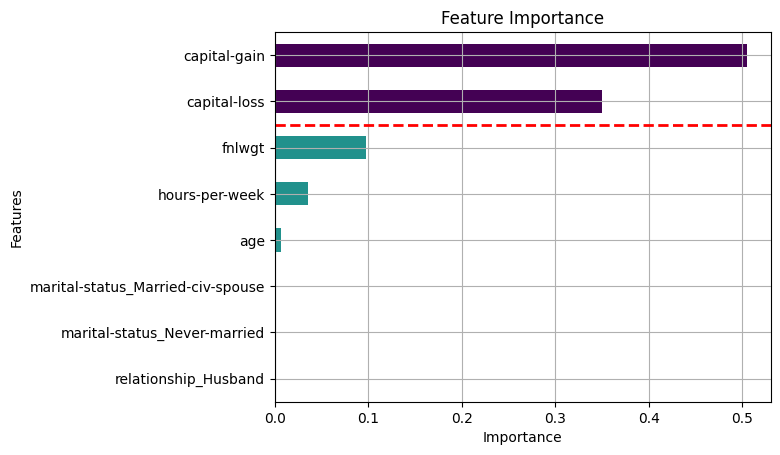

In [16]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances, top_n=8)

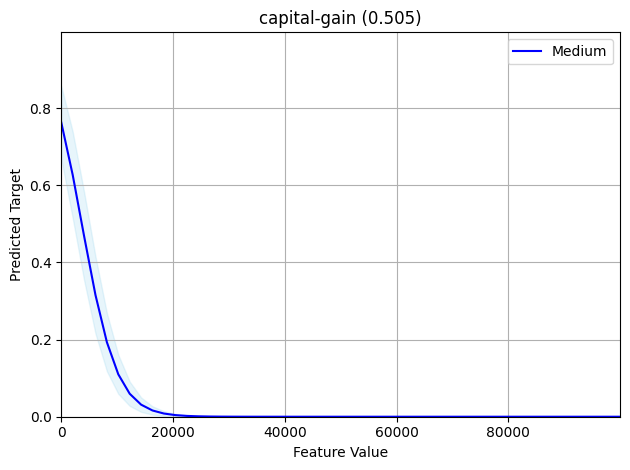

In [17]:
from holisticai.explainability.plots import plot_partial_dependence

class_index = 0
plot_partial_dependence(partial_dependencies, ranked_importances, class_idx=class_index)

# Multi Classification

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=200, random_state=42, stratify=dataset['y'])   
train = dataset['train']
test = dataset['test']

model = GradientBoostingClassifier()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.46

In [19]:
from holisticai.utils import MultiClassificationProxy
from holisticai.utils.feature_importances import compute_shap_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = MultiClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

local_importances = compute_shap_feature_importance(X=train['X'], proxy=proxy, max_samples=200)
local_conditional_importances = local_importances.conditional()

importances = local_importances.to_global()
conditional_importances = local_conditional_importances.to_global()

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(test['X'], features=ranked_importances.feature_names, proxy=proxy)

y_pred = proxy.predict(test['X'])

PermutationExplainer explainer: 196it [00:17,  4.79it/s]                         


In [20]:
from holisticai.explainability.metrics import multiclass_explainability_metrics

multiclass_explainability_metrics(importances, partial_dependencies, conditional_importances, test['X'], y_pred, local_importances)

,value,reference
metric,,
Alpha Importance Score,0.500000,0.0
XAI Ease Score,0.589744,1.0
Position Parity,0.576204,1.0
Rank Alignment,0.892308,1.0
Spread Ratio,0.889104,0.0
Spread Divergence,0.637064,0.0
Feature Stability,0.921973,1.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

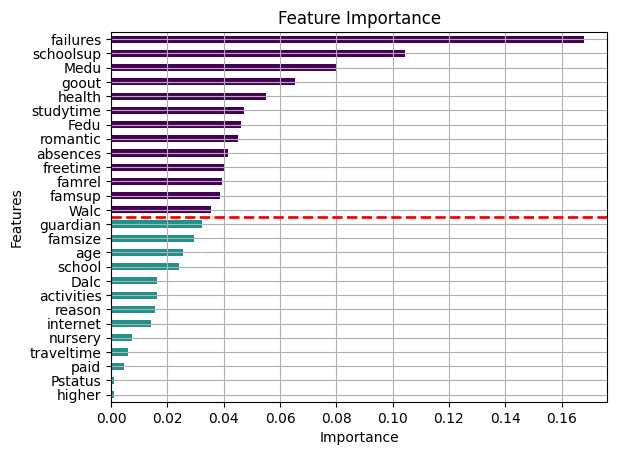

In [21]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances, top_n=30)

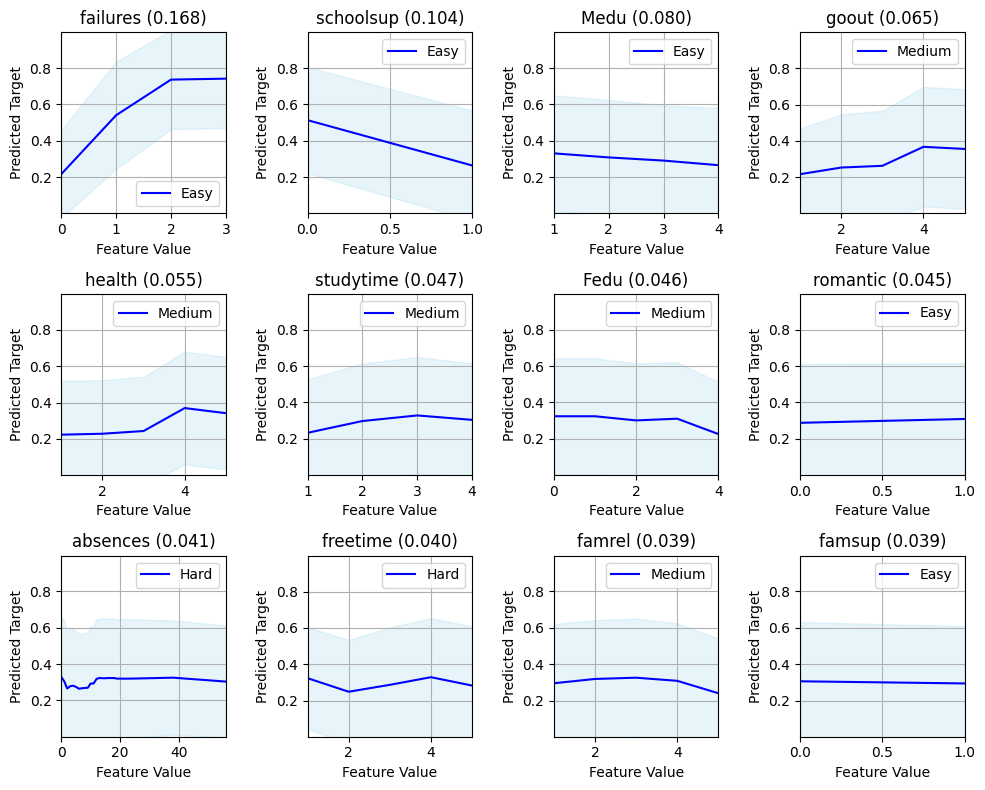

In [22]:
from holisticai.explainability.plots import plot_partial_dependence

class_idx = 0 #1
plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(3,4), figsize=(10,8), class_idx=class_idx)